<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Kлассификатор-дерева-решений" data-toc-modified-id="Kлассификатор-дерева-решений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Kлассификатор дерева решений</a></span></li><li><span><a href="#Kлассификатор-случайный-лес-(лучшая-модель)" data-toc-modified-id="Kлассификатор-случайный-лес-(лучшая-модель)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Kлассификатор случайный лес (лучшая модель)</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

## Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#сохраняем путь к файлу на сервере Практикума
server_path = '/datasets/Churn.csv' 

#сохраняем путь к файлу на компьютере
local_path = 'data.csv' 

try:                                                   #пробуем найти данные по сетевому адресу
    df = pd.read_csv(server_path) 
except:                                                #если не находим по сетевому, ищем по локальному
    df = pd.read_csv(local_path)    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Дейсвия по признаком:** 
- RowNumber — уникальное поля для нумерации строк, для анализа и обучения модели не потребуется; 
- CustomerId — для анализа и обучения модели не потребуется;
- Surname — для анализа и обучения модели не потребуется;
- CreditScore —  количественные переменная, проведем стандартизацию данных; 
- Geography — категориальная переменная (3 значения), применим технику прямого кодирования(OHE); 
- Gender —  категориальная переменная (2 значения), применим технику прямого кодирования(OHE);
- Age — количественные переменная, проведем стандартизацию данных, аномалий нет;
- Tenure — количественные переменная, проведем стандартизацию данных, но перед этим заполним пропуски терять 9% данных не хочется, заполним медианами;
- Balance — количественные переменная, проведем стандартизацию данных;
- NumOfProducts — количественные переменная, проведем стандартизацию данных;
- HasCrCard — категориальная переменная (0 и 1 значения), проводить технику прямого кодирования(OHE) нецелесообразно, уже числовые; 
- IsActiveMember — категориальная переменная (0 и 1 значения), проводить технику прямого кодирования(OHE) нецелесообразно, уже числовые;
- EstimatedSalary — количественные переменная, проведем стандартизацию данных;
- Exited — целевой параметр.

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) #  убираем лишнее

In [9]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()) # заполняем пропуски

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [11]:
df_ohe = pd.get_dummies( # OHE двух признаков
    df,
    drop_first=True,
    columns=['Gender', 'Geography']
)

In [12]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [13]:
# переменные для признаков и целевого признака 
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'] , axis=1)

In [14]:
# разбиение на обучающую данные .6 и.4 для валидации и тестирования 
features_train, features_temp, target_train, target_temp = train_test_split(
    features,
    target, 
    test_size=0.4, 
    random_state=12345,
    shuffle=True,
    stratify=target
)

In [15]:
# разбиение на данные для валидацию и тестирование по .5 (.2 по изначальной)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp,
    target_temp, 
    test_size=0.5, 
    random_state=12345,
    shuffle=True,
    stratify=target_temp
)

In [16]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [17]:
# стандартизация данных
pd.options.mode.chained_assignment = None

numeric = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

In [18]:
df['Exited'].value_counts(normalize=True) # баланс классов 

0    0.7963
1    0.2037
Name: Exited, dtype: float64

80/20 - прям по Парето 

In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear') # обучение модели логистической регресии без учета дисбаланса
model.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [20]:
# функция для вывода значений Precision, Recall, F1-мера, AUC-ROC по обученной модели
# со следующими параметрами:
#    - значения признаков;
#    - значения целевого признака;
#    - обученная модель. 

def print_metrics(features, target, model): #
    
    predicted = model.predict(features)
    probabilities = model.predict_proba(features) 
    probabilities_one = probabilities[:, 1]
    print(f'Precision: {precision_score(target, predicted):.3f}')
    print(f'Recall: {recall_score(target, predicted):.3f}')
    print(f'F1-мера: {f1_score(target, predicted):.3f}')
    print(f'AUC-ROC: {roc_auc_score(target, probabilities_one): .3f}')

In [21]:
# метрики логистической регрессии без учета баланса классов 

print_metrics(features_valid, target_valid, model) 

Precision: 0.609
Recall: 0.206
F1-мера: 0.308
AUC-ROC:  0.788


**Выводы**

1. Наблюдается дисбаланс классов, он 80/20, 80 – остаются, 20 – уходят.
2. Обучения без учета дисбаланса дало неудовлетворительный результат, т.к нам необходимо выявлять тех клиентов, что планируют уйти. То интересует в большей степени показатель recall, а он составляет 0.2, модель обнаруживает всего 20% от общего числа уходящих. 

## Борьба с дисбалансом

### Изменение порога

In [22]:
# изменение порога
probabilities_valid = model.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.55, 0.05): # цикл со смещением порога
    predicted_valid = probabilities_one_valid > threshold  # 
    precision = precision_score(target_valid, predicted_valid) 
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print(f'Порог = {threshold:.2f} | Точность = { precision:.3f}, Полнота = {recall:.3f}, f1 = {f1:.3f}')

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, f1 = 0.339
Порог = 0.05 | Точность = 0.226, Полнота = 0.988, f1 = 0.368
Порог = 0.10 | Точность = 0.276, Полнота = 0.929, f1 = 0.426
Порог = 0.15 | Точность = 0.333, Полнота = 0.836, f1 = 0.476
Порог = 0.20 | Точность = 0.387, Полнота = 0.733, f1 = 0.506
Порог = 0.25 | Точность = 0.435, Полнота = 0.640, f1 = 0.518
Порог = 0.30 | Точность = 0.483, Полнота = 0.529, f1 = 0.505
Порог = 0.35 | Точность = 0.520, Полнота = 0.414, f1 = 0.461
Порог = 0.40 | Точность = 0.545, Полнота = 0.353, f1 = 0.429
Порог = 0.45 | Точность = 0.544, Полнота = 0.257, f1 = 0.349
Порог = 0.50 | Точность = 0.609, Полнота = 0.206, f1 = 0.308


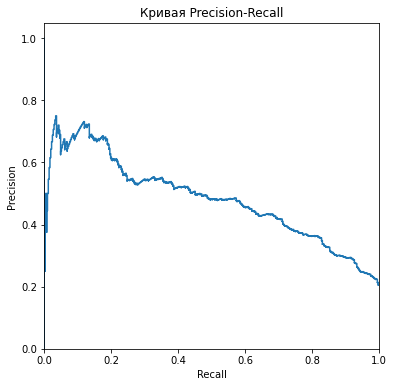

In [23]:
# построение кривой ROC

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

### Увеличение выборки

In [24]:
# функция для увеличения количества записей по классу "1"
# со следующими параметрами:
#    - значения признаков;
#    - значения целевого признака;
#    - коэффициент увлечения.


def upsample(features, target, repeat): 

    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # перемешиваем и возвращаем
    return shuffle(features_upsampled, random_state=12345), shuffle(target_upsampled, random_state=12345) 

In [25]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4) # модифицируем тренировочную выборку 

In [26]:
model = LogisticRegression(random_state=12345, solver='liblinear') # обучаем модель
model.fit(features_upsampled, target_upsampled)

LogisticRegression(random_state=12345, solver='liblinear')

In [27]:
# метрики логистической регрессии с учетом баланса классов 

print_metrics(features_valid, target_valid, model)  #

Precision: 0.406
Recall: 0.743
F1-мера: 0.525
AUC-ROC:  0.794


### Взвешивание классов

In [28]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')  # обучаем модель
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [29]:
# метрики логистической регрессии с учетом баланса классов 
print_metrics(features_valid, target_valid, model)

Precision: 0.412
Recall: 0.738
F1-мера: 0.529
AUC-ROC:  0.794


### Kлассификатор дерева решений

In [30]:
tree_best_model = None
best_result = 0
best_feature = 0
best_depth = 0

for depth in [4, 8, 16]:
    for feature in [2, 3, 4, 5]:
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, max_features=feature, class_weight='balanced') # задать глубинуи дерева
        model.fit(features_train, target_train) # обучите модель с заданной глубиной дерева
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # посчитайте качество модели
        if result > best_result:
            tree_best_model = model # сохраним модель для тестирования
            best_result = result
            best_feature = feature
            best_depth = depth
            
print(f'F1 лучшей модели дерьвья решений: {best_result:.4} Глубина: {depth} Максимальное число признаков: {best_feature}')

F1 лучшей модели дерьвья решений: 0.5612 Глубина: 16 Максимальное число признаков: 2


In [31]:
print_metrics(features_valid, target_valid, tree_best_model)

Precision: 0.465
Recall: 0.708
F1-мера: 0.561
AUC-ROC:  0.798


### Kлассификатор случайный лес (лучшая модель)

In [32]:
%%time

forest_best_model = None
best_result = 0
best_est = 0
best_depth = 0
f1_depth_list = []
roc_auc_depth_list = []
f1_est_list = []
roc_auc_est_list = []

# поиск оптимальной глубины дерева на малом лесе 
for depth in range(1, 16): 
        model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid) 
        probabilities_one_valid = probabilities_valid[:, 1]
        result = f1_score(target_valid, predicted_valid) # посчитайте качество модели на валидационной выборке
        roc_auc_depth_list.append(roc_auc_score(target_valid, probabilities_one_valid))
        f1_depth_list.append(result)
        if result > best_result:
            best_depth = depth
            best_result = result

best_result = 0

# поиск оптимальной модели в зависимости от размера леса
for est in range(60, 101, 10): # количество деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=best_depth, class_weight='balanced') 
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid) 
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predicted_valid) # посчитайте качество модели на валидационной выборке
    roc_auc_est_list.append(roc_auc_score(target_valid, probabilities_one_valid))
    f1_est_list.append(result)
    if result > best_result:
        forest_best_model = model # сохраним модель для тестирования
        best_result = result 
        best_est = est
            
print(f'F1 лучшей модели случайного леса: {best_result:.4} Количество деревьев:{best_est} Максимальная глубина: {best_depth}')            

F1 лучшей модели случайного леса: 0.6471 Количество деревьев:60 Максимальная глубина: 9
Wall time: 2.49 s


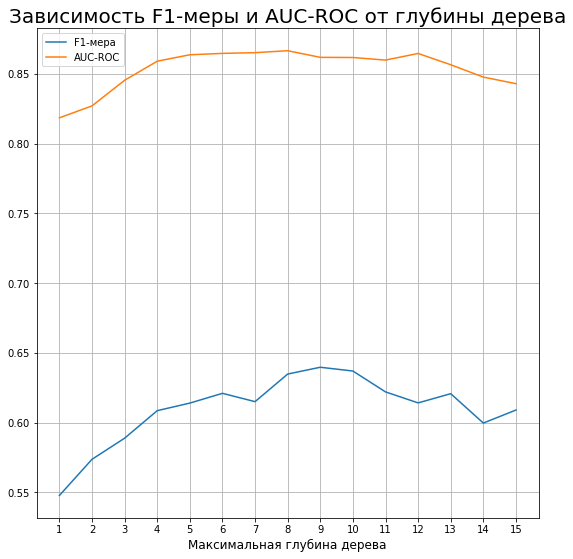

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(range(1, 16), f1_depth_list)
ax.plot(range(1, 16), roc_auc_depth_list)
plt.title('Зависимость F1-меры и AUC-ROС от глубины дерева', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(True)
plt.xlabel('Максимальная глубина дерева',  fontsize=12)
plt.legend(['F1-мера', 'AUC-ROС'])
plt.grid(True)
plt.show()

### Выводы

1. Балансировка классов в рамках логистической регрессии, если рассматривать метрику AUC-ROC, сильных изменения не дала.
2. Изменение порога наглядно демонстрирует, что за счет различных методов балансировки, происходит движения по кривой-PR и находится оптимальное баланс между Precision и Recall, но качество модели остается не именным.
3. Для качественного перехода, был выбран другой тип модели "Случайный Лес" подобраны гиперпараметры. Выбор нового типа дало хороший прирост и позволило решить задачу.
4. Из графика видно, что между F1-мерой и AUC-ROC прослеживается зависимость, хотя если опираться на AUC-ROC то оптимальную модель можно, было бы поискать при значении - максимальной глубины дерева 6-8.    

## Тестирование модели

In [34]:
# окончательный результат
print_metrics(features_test, target_test, forest_best_model)

Precision: 0.575
Recall: 0.629
F1-мера: 0.601
AUC-ROC:  0.849


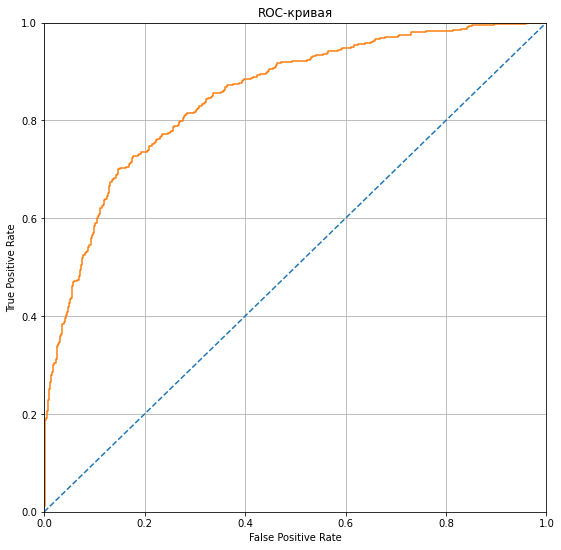

In [35]:
probabilities_test = forest_best_model.predict_proba(features_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1]) 

plt.figure(figsize=(9, 9))

# < постройте график >

plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели 
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid(True)
plt.show()

**Вывод**
- Значение AUC-ROC 0.854, означит что модель верно упорядочивает 85,4 % пар наших объектов;
- Кривая хоть и чуть сильнее, но стремится к точке (0,1);
- Кривая значительно выше кривой случайной модели. 